## Worksheet 3 - Manipulating Image Matrices and Keyboard input

### TASK 1
1.	Create a Python program which loads an image, convert it to grayscale and store it an a numpy array.
2.	Research how to use the input() function, cast the input to an integer and store the result in a variable named t_value.
3.	invert an image making use of a user inputted threshold, using the formula:  im_result = t_value - im
4.	Introduce validation to avoid thresholds outside the 0 to 255 range.

### TASK 2 - Subplots
1.	Load the PIL, pyplot and numpy libraries.
2.	Open an RGB image of your choice, storing it in a 3D matrix.
3.	Create an Octave program that displays each colour in an RGB image separately.  Use a 2x2 subplot to display each colour and the original image.  Switch off display of axis in your 2x2 subplot.
4.	Save the Red, Green and Blue images separately.
 
### TASK 3 – Splitting images 
1.	Open an RGB image of your choice, storing it in a 3D matrix.
2.	Use the shape() function to calculate the width and height of the image.  Store these values into two variables width and height.  
3.	Use these variables to split the image into four separate matrices.  
4.	Display the matrices as four images in a 2x2 subplot. 

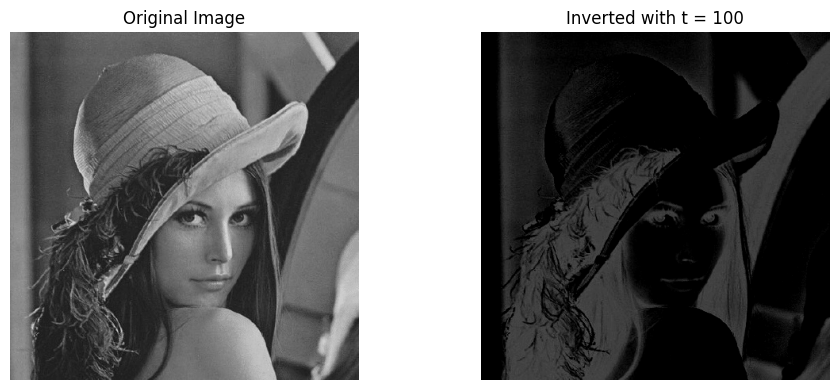

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1.1 Load grayscale image as uint8
image = cv2.imread(r'C:\SCHOOL\Image Processing & Computer Vision\Class Examples\lena.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Could not load image. Check the path.")

# 1.2 + 1.4 Ask until we get a valid threshold in [0,255]
while True:
    try:
        t_value = int(input("Enter a threshold value (0-255): "))
        if 0 <= t_value <= 255:
            break
        else:
            print("Invalid threshold value. Please enter a value between 0 and 255.")
    except ValueError:
        print("Please enter an integer between 0 and 255.")

# Option A: use a wider dtype, then clip back to uint8
im_result = t_value - image.astype(np.int16)   # this can be negative now
im_result = np.clip(im_result, 0, 255).astype(np.uint8)

# Option B (OpenCV saturation arithmetic): t - image using cv2.subtract
# im_result = cv2.subtract(np.full_like(image, t_value), image)

# Show results
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image'); plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_result, cmap='gray', vmin=0, vmax=255)
plt.title(f'Inverted with t = {t_value}'); plt.axis('off')
plt.tight_layout(); plt.show()


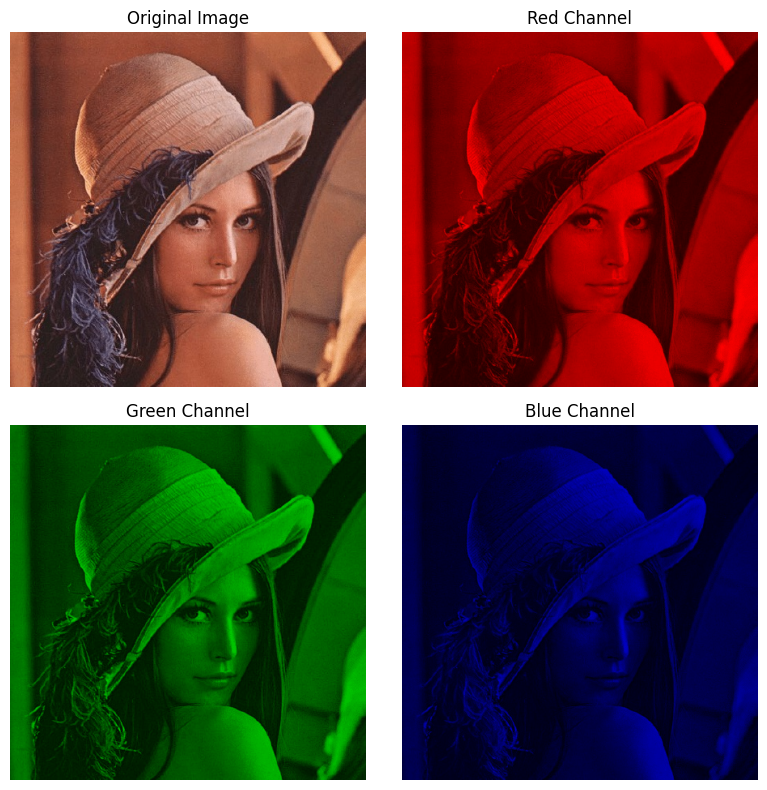

In [11]:
# 2.1.  Load the PIL, pyplot and numpy libraries.
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# 2.2.  Open an RGB image of your choice, storing it in a 3D matrix.
image_rgb = Image.open('C:\\SCHOOL\\Image Processing & Computer Vision\\Class Examples\\lena.jpg')
image_array = np.array(image_rgb)

# 2.3.  Create an Octave program that displays each colour in an RGB image separately.  Use a 2x2 subplot to display each colour and the original image.  Switch off display of axis in your 2x2 subplot.
# 2.4.  Save the Red, Green and Blue images separately.

# Split the image into its Red, Green, and Blue components
red_channel = image_array.copy()
red_channel[:, :, 1] = 0  # Zero out Green channel
red_channel[:, :, 2] = 0  # Zero out Blue channel

green_channel = image_array.copy()
green_channel[:, :, 0] = 0  # Zero out Red channel
green_channel[:, :, 2] = 0  # Zero out Blue channel

blue_channel = image_array.copy()
blue_channel[:, :, 0] = 0  # Zero out Red channel
blue_channel[:, :, 1] = 0  # Zero out Green channel

# Display the original and color-separated images
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(red_channel)
plt.title('Red Channel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(green_channel)
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(blue_channel)
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

Width: 440, Height: 439


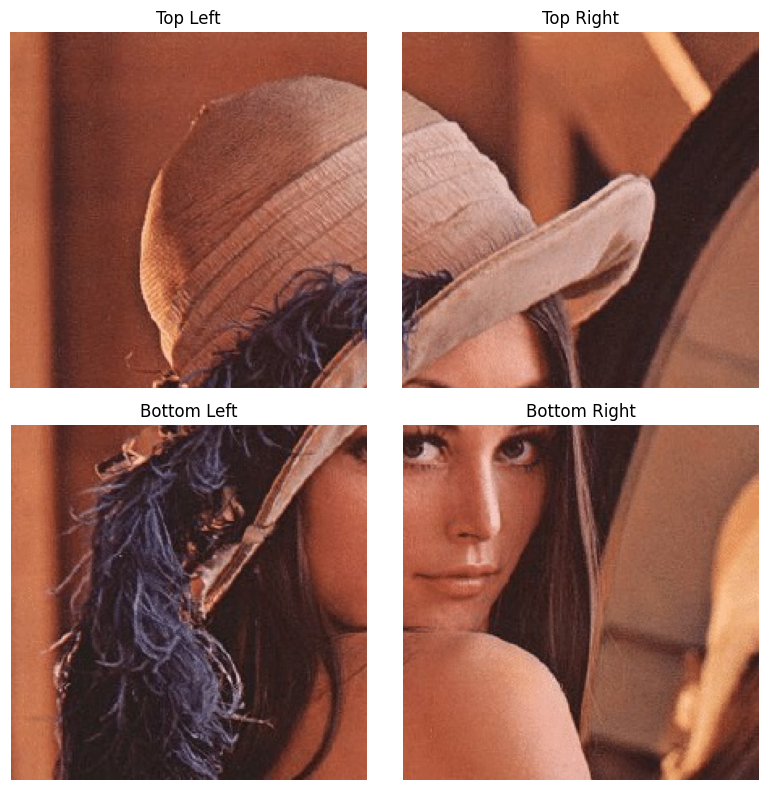

In [ ]:
# 3.1.	Open an RGB image of your choice, storing it in a 3D matrix.
image_rgb = Image.open('C:\\SCHOOL\\Image Processing & Computer Vision\\Class Examples\\lena.jpg')
image_array = np.array(image_rgb)

# 3.2.  Use the shape() function to calculate the width and height of the image.  Store these values into two variables width and height.  
height, width, _ = image_array.shape
print(f"Width: {width}, Height: {height}")

# 3.3. Use these variables to split the image into four separate matrices.
top_left_quadrant = image_array[:height//2, :width//2] # This means rows 0 to height/2 and columns 0 to width/2
top_right_quadrant = image_array[:height//2, width//2:]
bottom_left_quadrant = image_array[height//2:, :width//2]
bottom_right_quadrant = image_array[height//2:, width//2:]

# 3.4. Display the matrices as four images in a 2x2 subplot. 
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(top_left_quadrant)
plt.title('Top Left')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(top_right_quadrant)
plt.title('Top Right')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bottom_left_quadrant)
plt.title('Bottom Left')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bottom_right_quadrant)
plt.title('Bottom Right')
plt.axis('off')

plt.tight_layout()
plt.show()